In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

Exercise 5 
A trombone player can play a glissando by extending the trombone slide while blowing continuously. As the slide extends, the total length of the tube gets longer, and the resulting pitch is inversely proportional to length.
Assuming that the player moves the slide at a constant speed, how does frequency vary with time?
Write a class called TromboneGliss that extends Chirp and provides evaluate. Make a wave that simulates a trombone glissando from C3 up to F3 and back down to C3. C3 is 262 Hz; F3 is 349 Hz.
Plot a spectrogram of the resulting wave. Is a trombone glissando more like a linear or exponential chirp?

長號演奏者可以通過在連續吹奏的同時延長長號滑動來演奏滑音。隨著滑塊的延伸，管的總長度會變長，並且最終的音高與長度成反比。
假設播放器以恆定速度移動幻燈片，頻率如何隨時間變化？
編寫一個名為TromboneGliss的class，該class擴展了Chirp並提供評估。進行模擬從C3到F3再到C3的長號glissando的波浪。 C3為262 Hz; F3為349 Hz。
繪製產生的波的頻譜圖。長號glissando更像是線性或指數的chirp？

編寫一個名為TromboneGliss的class，該class擴展了Chirp並提供評估。

In [2]:
from thinkdsp import Chirp

class TromboneGliss( Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts)-1)
        freqs = 1 / lengths
        return self._evaluate(ts, freqs)

先進行模擬從C3到F3。

In [9]:
low = 262 #c3
high = 349 #f3
signal = TromboneGliss(high, low)
wave1 = signal.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

在進行模擬從F3到C3。

In [4]:
signal = TromboneGliss(low, high)
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

In [ ]:
最後將兩個結合，從C3到F3再到C3。

In [5]:
wave = wave1 | wave2
wave.make_audio()

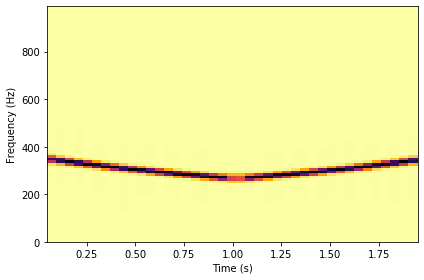

In [6]:
sp = wave.make_spectrogram(1024)
sp.plot(high=1000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')